In [3]:
import pandas as pd
import pathlib

dataset_annotations = pd.read_csv("train/_annotations.csv")

dataset_annotations

,filename,width,height,class,xmin,ymin,xmax,ymax
0,500_1e28e15b348d4228a63752a81a5841c1_jpg.rf.81...,640,640,500,1,2,118,448
1,1000_7ea4fd678e8c496e8ce17f94936b1cb8_jpg.rf.8...,640,640,1000,169,0,467,182
2,20_20bf4a7c5d6948bd807f80d8ea387961_jpg.rf.81d...,640,640,20,0,0,61,450
3,100_c563e79a8629457bb82fb96cee519a9e_jpg.rf.81...,640,640,100,0,95,62,537
4,200_ce3c5161d5cf454faaccb001e38b31d2_jpg.rf.81...,640,640,200,194,451,446,543
...,...,...,...,...,...,...,...,...
15112,1000_61545d44366e4f1ba4e03fad5e28c063_jpg.rf.c...,640,640,1000,270,97,372,324
15113,100_2848eab7f9834ba19c681d1a7181ffa8_jpg.rf.c0...,640,640,100,0,457,308,553
15114,1000_d253fab7b1d84a008b41eb8f033d2909_jpg.rf.c...,640,640,1000,256,5,377,447
15115,100_47c1966bcf34402cb9730e03aec1d732_jpg.rf.bf...,640,640,100,0,0,145,180


In [7]:
dataset_count = len(dataset_annotations)
print('Number of images that has Banknotes: ', dataset_count)

Number of images that has Banknotes:  15117


In [10]:
dataset_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15117 non-null  object
 1   width     15117 non-null  int64 
 2   height    15117 non-null  int64 
 3   class     15117 non-null  int64 
 4   xmin      15117 non-null  int64 
 5   ymin      15117 non-null  int64 
 6   xmax      15117 non-null  int64 
 7   ymax      15117 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 944.9+ KB


15543


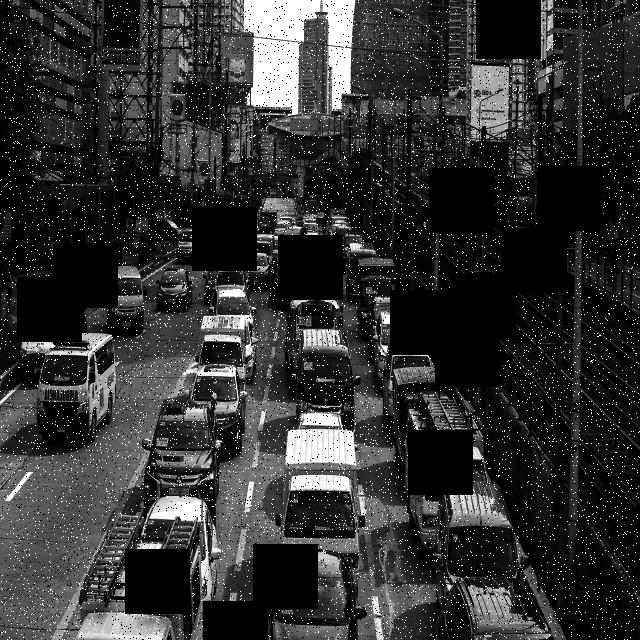

In [45]:
import PIL, glob, pathlib

images = pathlib.Path('train/')
list_of_images = list(images.glob('*.jpg'))
print(len(list(images.glob('*.jpg'))))
PIL.Image.open(list_of_images[15542])

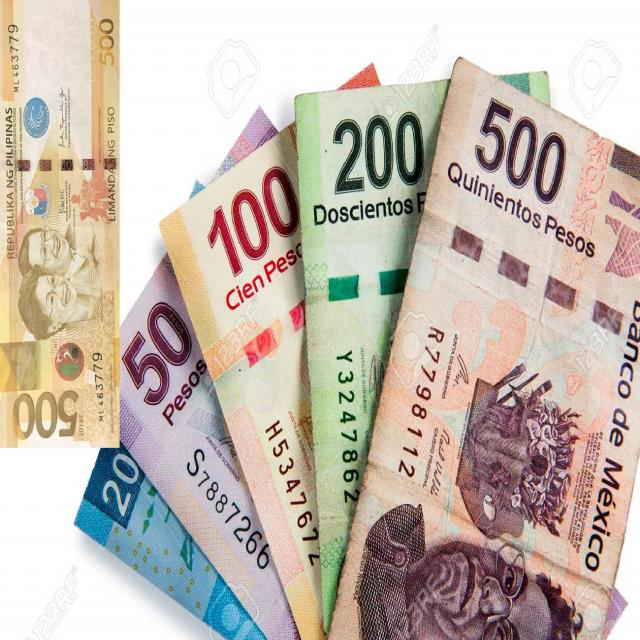

In [95]:
import PIL.Image as pil

banknote_filenames = dataset_annotations['filename']
pil.open('train/' + banknote_filenames[0])

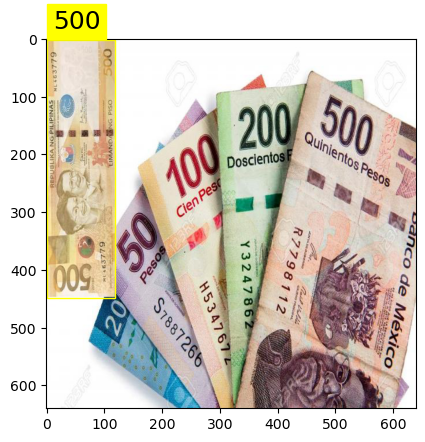

In [29]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches # Boundaries

from PIL import Image

image_name = '500_1e28e15b348d4228a63752a81a5841c1_jpg.rf.818d9dcb4399b5aa8b9ab95f9cc30b22.jpg'

img = Image.open('train/' + image_name)
fig, ax = plt.subplots()

dataset_annotations = pd.read_csv("train/_annotations.csv")

xmin = dataset_annotations['xmin']
ymin = dataset_annotations['ymin']
xmax = dataset_annotations['xmax']
ymax = dataset_annotations['ymax']

width = abs(xmin[0] - xmax[0])
height = abs(ymin[0] - ymax[0])

plt.text(xmin[0] + 10, ymin[0] - 20, '500', fontdict={'fontsize':18.0, 'color':'Black', 'backgroundcolor':'Yellow'})
bb = patches.Rectangle((xmin[0], ymin[0]), width=width, height=height, facecolor='none', edgecolor='yellow')
ax.add_patch(bb)

ax.imshow(img)
plt.show()

In [5]:
import pandas as pd
from PIL import ImageDraw, Image

# image_name = './train/500_1e28e15b348d4228a63752a81a5841c1_jpg.rf.818d9dcb4399b5aa8b9ab95f9cc30b22.jpg'
dataset_annotations = pd.read_csv("train/_annotations.csv")
xmin = dataset_annotations['xmin']
ymin = dataset_annotations['xmin']
xmax = dataset_annotations['xmax']
ymax = dataset_annotations['ymax']
height = abs(xmin[0] - xmax[0])
width = abs(ymin[0] - ymax[0])


def add_rectangle_to(im, topleft, bottomleft, colour):
    draw = ImageDraw.Draw(im)
    draw.rectangle((topleft, bottomleft), outline=colour)
    return im
    
    
with Image.open('./train/500_1e28e15b348d4228a63752a81a5841c1_jpg.rf.818d9dcb4399b5aa8b9ab95f9cc30b22.jpg') as im:
    im_rectange = add_rectangle_to(im, (xmin[0], ymin[0]), (height, width), 'yellow')
    im_rectange.save('MERON.jpg')
    

117